## This notebooks demonstrate how we can (or cannot) accurately reconstruct wavefront Zernikes on a vignetted pupil

Dealing with the Zernikes requires the cwfs package at https://github.com/bxin/cwfs

In [1]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lsst.cwfs.tools import ZernikeAnnularEval, ZernikeMaskedFit
import matplotlib.colors as colors

mpl.rc('image', cmap='jet')

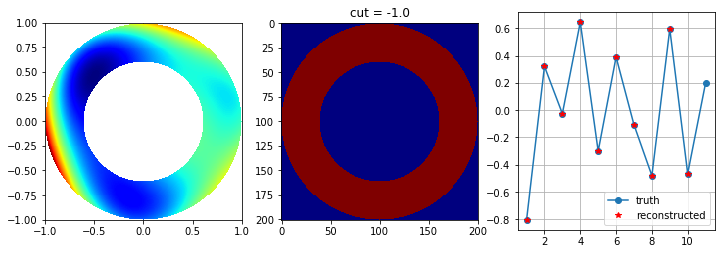

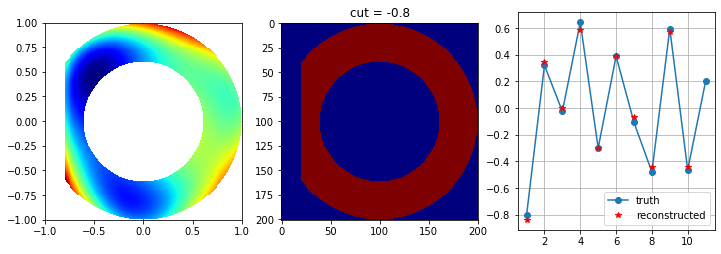

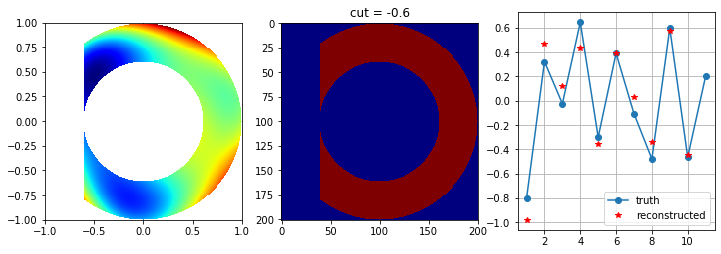

In [2]:
#set up the pupil
x1d = np.linspace(-1,1,201)
e = 0.61

nzc = 11 #number of zernike in input wavefront
nzr = 10 #r for reconstruction
np.random.seed(1000)
zc = np.random.normal(size=nzc) #z1-z22
zc[-1]=0.2 #we use this term to represent higher order terms, not too big
    
for cut in np.arange(-1.0, -0.4, 0.2):
    x, y = np.meshgrid(x1d, x1d)
    r = np.sqrt(x**2 + y**2)
    idx = (r>1) | (r<e) | (x< cut)
    
    x[idx] = np.nan
    y[idx] = np.nan
    r[idx] = np.nan

    w = ZernikeAnnularEval(zc, x, y, e)
    mask =  ~np.isnan(x)
    x0c = np.arange(nzc)
    zr = ZernikeMaskedFit(w, x, y, nzr, mask, e)
    x0r = np.arange(nzr)

    fig, ax = plt.subplots(1,3, figsize=(12,4))
    ax[0].imshow(w, extent=[min(x1d), max(x1d), min(x1d), max(x1d)])
    ax[1].imshow(mask)
    ax[1].set_title('cut = %.1f'%cut)
    ax[2].plot(x0c+1, zc, '-o', label='truth')
    ax[2].plot(x0r+1, zr, 'r*', label='reconstructed')
    ax[2].legend()
    ax[2].grid();